# Informe y estudio de Telecomx

### Importando datos

In [22]:
import pandas as pd

In [21]:
df= pd.read_json('/content/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


### limpieza de datos y verificando inconsistencias

In [23]:

customer_df = pd.json_normalize(df['customer'])


phone_df = pd.json_normalize(df['phone'])


internet_df = pd.json_normalize(df['internet'])

account_df = pd.json_normalize(df['account'])


datatele_cleaned = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


for col in ['tenure', 'Charges.Monthly', 'Charges.Total']:
    datatele_cleaned[col] = pd.to_numeric(datatele_cleaned[col], errors='coerce')
datatele_cleaned.fillna(0, inplace=True)



display(datatele_cleaned.head())

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']


numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


datatele_encoded = preprocessor.fit_transform(datatele_cleaned)



onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(onehot_feature_names)

df_normalizado = pd.DataFrame(datatele_encoded, columns=all_feature_names)



df_normalizado = pd.concat([datatele_cleaned[['customerID', 'Churn']], df_normalizado], axis=1)



display(df_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


,customerID,Churn,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,No,0.125000,0.471144,0.068315,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0003-MKNFE,No,0.125000,0.414428,0.062454,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0004-TLHLJ,Yes,0.055556,0.553731,0.032338,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0011-IGKFF,Yes,0.180556,0.793532,0.142531,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0013-EXCHZ,Yes,0.041667,0.653234,0.030789,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### calculo en columna cuentas diarias

In [24]:

datatele_cleaned['Cuentas_Diarias'] = datatele_cleaned['Charges.Monthly'] / 30


display(datatele_cleaned.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### estandarizado datos

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


datatele_cleaned.rename(columns={'Churn': 'Abandono'}, inplace=True)

# (Yes=1, No=0)u78
datatele_cleaned['Abandono'] = datatele_cleaned['Abandono'].apply(lambda x: 1 if x == 'Yes' else 0)



numerical_features = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']



numerical_transformer = Pipeline(steps=[('passthrough', 'passthrough')])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough') # Keep other columns ('customerID')


datatele_processed = preprocessor.fit_transform(datatele_cleaned.drop(columns=['customerID', 'Abandono']))


onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(onehot_feature_names)


datatele_processed_df = pd.DataFrame(datatele_processed, columns=all_feature_names)


datatele_processed_df = pd.concat([datatele_cleaned[['customerID', 'Abandono']], datatele_processed_df], axis=1)


display(datatele_processed_df.head())

,customerID,Abandono,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,9.0,65.6,593.30,2.186667,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0003-MKNFE,0,9.0,59.9,542.40,1.996667,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0004-TLHLJ,1,4.0,73.9,280.85,2.463333,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0011-IGKFF,1,13.0,98.0,1237.85,3.266667,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0013-EXCHZ,1,3.0,83.9,267.40,2.796667,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:

import pandas as pd
import numpy as np
import json


df = pd.read_json('/content/TelecomX_Data.json')

# Normalizar
df_flat = pd.json_normalize(df.to_dict(orient='records'))


df_flat.columns = df_flat.columns.str.strip()


df_flat.columns = df_flat.columns.str.replace('.', '_', regex=False)

df_flat['account_Charges_Total'] = pd.to_numeric(df_flat['account_Charges_Total'], errors='coerce')


df_flat.drop_duplicates(subset='customerID', inplace=True)


df_flat.dropna(subset=['Churn', 'account_Charges_Total'], inplace=True)


df_flat['Churn'] = df_flat['Churn'].replace('', np.nan)
df_flat.dropna(subset=['Churn'], inplace=True)

# nuevo DataFrame limpio
df_normalizado = df_flat.reset_index(drop=True)

### Revisión datos

In [43]:

# Revisión
print(df_normalizado.shape)
print(df_normalizado['Churn'].value_counts())
df_normalizado.info()

(7267, 48)
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7267 non-null   object 
 1   Churn                                    7267 non-null   object 
 2   tenure                                   7267 non-null   float64
 3   Charges.Monthly                          7267 non-null   float64
 4   Charges.Total                            7267 non-null   float64
 5   gender_Female                            7267 non-null   float64
 6   gender_Male                              7267 non-null   float64
 7   SeniorCitizen_0                          7267 non-null   float64
 8   SeniorCitizen_1                          7267 non-null   float64
 9   Partner_No                             

### Revisión de dataframe y creación primaria de gráfico evacion

###  Distribución de clientes que cancelaron vs no cancelaron

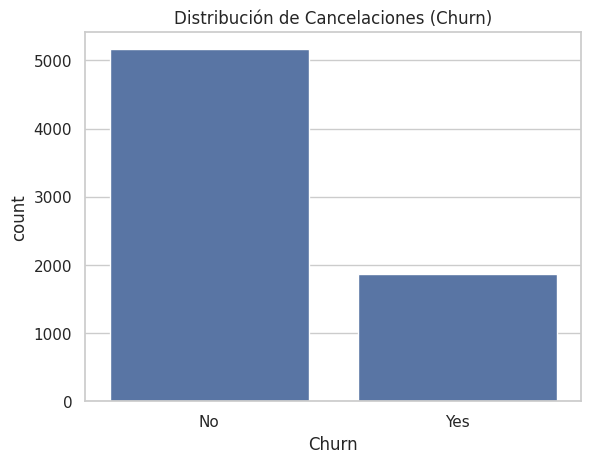

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df_normalizado, x='Churn')
plt.title('Distribución de Cancelaciones (Churn)')
plt.show()

### Comparación de cargos mensuales

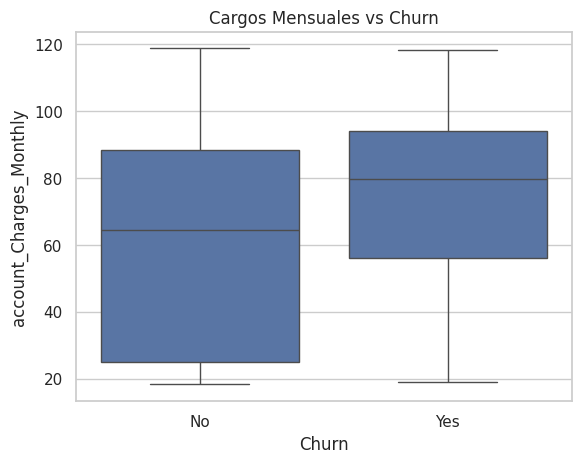

In [49]:

sns.boxplot(data=df_normalizado, x='Churn', y='account_Charges_Monthly')
plt.title('Cargos Mensuales vs Churn')
plt.show()

### análisis de tiempo como cliente

### comparando columnas

###transformando data para mayor comprensión estandarizado

In [50]:
df_transformado = df_normalizado.copy()

#.  valores "Yes"/"No" a 1/0
cols_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in cols_binarias:
    df_transformado[col] = df_transformado[col].map({'Yes': 1, 'No': 0})

# Correctly map 'Yes' to 1 and 'No' to 0 for the 'Churn' column
df_transformado['Churn'] = df_transformado['Churn'].map({'Yes': 1, 'No': 0})

# Algunas columnas tienen valores como "No internet service" o "No phone service"
# Convierte esas a 0
valores_especiales = ['No internet service', 'No phone service']
for col in df_transformado.columns:
    if df_transformado[col].dtype == 'object':
        df_transformado[col] = df_transformado[col].replace(valores_especiales, 'No')

# Calculate 'FacturacionDiaria' after creating df_transformado
df_transformado['FacturacionDiaria'] = df_transformado['account_Charges_Monthly'] / 30

# Renomar columna 'Cuentas_Diarias' a 'FacturacionDiaria' (This line is no longer needed as we are calculating it directly)
# df_transformado.rename(columns={'Cuentas_Diarias': 'FacturacionDiaria'}, inplace=True)

# Renombrar columnas a nombres en español
df_transformado = df_transformado.rename(columns={
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'EsAdultoMayor',
    'customer_Partner': 'TienePareja',
    'customer_Dependents': 'TieneDependientes',
    'customer_tenure': 'MesesAntiguedad',
    'phone_PhoneService': 'TieneTelefono',
    'phone_MultipleLines': 'TieneLineasMultiples',
    'internet_InternetService': 'TipoInternet',
    'internet_OnlineSecurity': 'SeguridadOnline',
    'internet_OnlineBackup': 'RespaldoOnline',
    'internet_DeviceProtection': 'ProteccionDispositivo',
    'internet_TechSupport': 'SoporteTecnico',
    'streamingTV': 'StreamingTV',
    'streamingMovies': 'StreamingPeliculas',
    'account_Contract': 'TipoContrato',
    'account_PaperlessBilling': 'FacturaDigital',
    'account_PaymentMethod': 'MetodoPago',
    'account_Charges_Monthly': 'FacturacionMensual',
    'account_Charges_Total': 'FacturacionTotal'
})


# Verifico
display(df_transformado.head())

,customerID,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesAntiguedad,TieneTelefono,TieneLineasMultiples,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,internet_StreamingTV,internet_StreamingMovies,TipoContrato,FacturaDigital,MetodoPago,FacturacionMensual,FacturacionTotal,FacturacionDiaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [51]:

from IPython.display import display, Markdown

display(Markdown("### Tabla de cuentas diarias y mensuales"))

df_normalizado['Cuentas_Diarias'] = df_normalizado['account_Charges_Monthly'] / 30

df_normalizado[['account_Charges_Monthly', 'Cuentas_Diarias']].head()

### Tabla de cuentas diarias y mensuales

,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### Estadísticas generales para tomas de decisiones

In [53]:
from IPython.display import display, Markdown

display(Markdown("### Tabla de estadística"))
df_transformado.describe().T

### Tabla de estadística

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
EsAdultoMayor,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
TienePareja,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
TieneDependientes,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
MesesAntiguedad,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
TieneTelefono,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
TieneLineasMultiples,6352.0,0.467097,0.498955,0.000000,0.00000,0.000,1.000000,1.000000
SeguridadOnline,5512.0,0.365566,0.481632,0.000000,0.00000,0.000,1.000000,1.000000
RespaldoOnline,5512.0,0.439949,0.496426,0.000000,0.00000,0.000,1.000000,1.000000
ProteccionDispositivo,5512.0,0.438679,0.496271,0.000000,0.00000,0.000,1.000000,1.000000


In [54]:
# Agrupamos por Churn y calculamos estadísticas
df_resumen_churn = df_transformado.groupby('Churn')[['MesesAntiguedad', 'FacturacionMensual', 'FacturacionTotal', 'FacturacionDiaria']].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).T

# Mostrar tabla ordenada
display(df_resumen_churn)

Churn                                0            1
MesesAntiguedad    count   5163.000000  1869.000000
                   mean      37.650010    17.979133
                   median    38.000000    10.000000
                   std       24.076940    19.531123
                   min        1.000000     1.000000
                   max       72.000000    72.000000
FacturacionMensual count   5163.000000  1869.000000
                   mean      61.307408    74.441332
                   median    64.450000    79.650000
                   std       31.094557    24.666053
                   min       18.250000    18.850000
                   max      118.750000   118.350000
FacturacionTotal   count   5163.000000  1869.000000
                   mean    2555.344141  1531.796094
                   median  1683.600000   703.550000
                   std     2329.456984  1890.822994
                   min       18.800000    18.850000
                   max     8672.450000  8684.800000
FacturacionDiaria  count   5163.000000  1869.000000
                   mean       2.043580     2.481378
                   median     2.148333     2.655000
                   std        1.036485     0.822202
                   min        0.608333     0.628333
                   max        3.958333     3.945000

In [55]:

# Exportar como archivo CSV
df_resumen_churn.to_csv('/content/Resumen_Estadistico_Churn.csv')

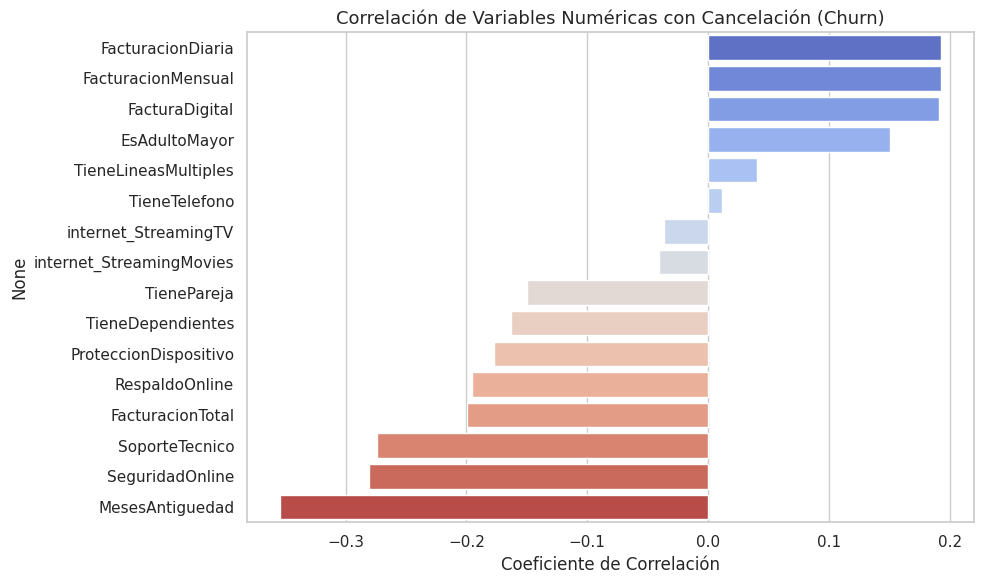

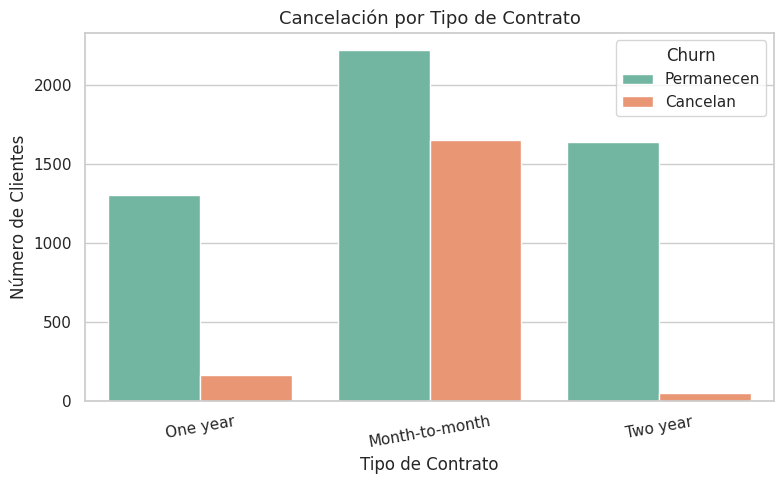

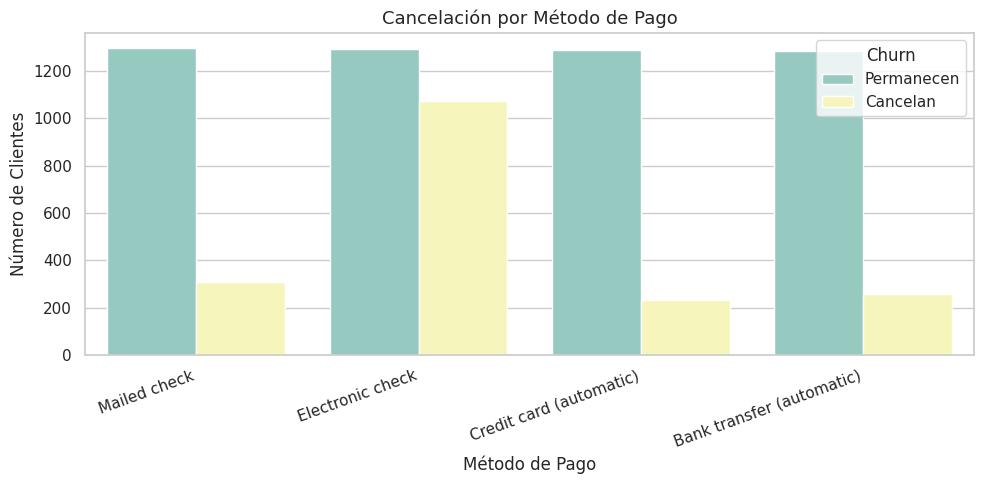

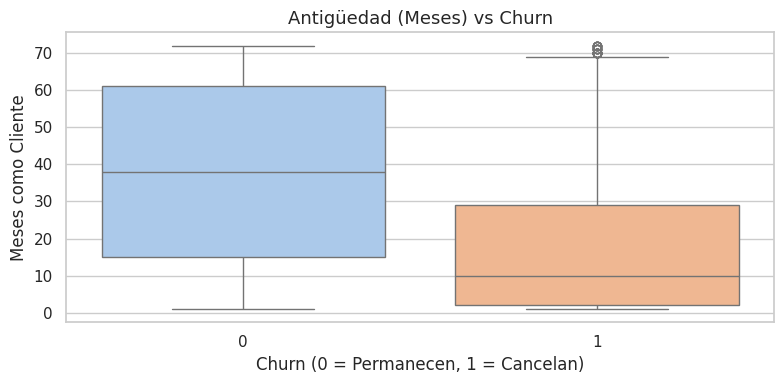

In [56]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

df_churn = df_transformado[df_transformado['Churn'].isin([0, 1])]

# 1. Correlación con Churn
plt.figure(figsize=(10, 6))
corr = df_churn.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title('Correlación de Variables Numéricas con Cancelación (Churn)', fontsize=13)
plt.xlabel('Coeficiente de Correlación')
plt.tight_layout()
plt.show()

#  2. Cancelación por Tipo de Contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=df_churn, x='TipoContrato', hue='Churn', hue_order=[0, 1], palette='Set2')
plt.title('Cancelación por Tipo de Contrato', fontsize=13)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permanecen', 'Cancelan'])
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

#  3. Cancelación por Método de Pago
plt.figure(figsize=(10, 5))
sns.countplot(data=df_churn, x='MetodoPago', hue='Churn', hue_order=[0, 1], palette='Set3')
plt.title('Cancelación por Método de Pago', fontsize=13)
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permanecen', 'Cancelan'])
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

# 4. Antigüedad
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_churn, x='Churn', y='MesesAntiguedad', palette='pastel')
plt.title('Antigüedad (Meses) vs Churn', fontsize=13)
plt.xlabel('Churn (0 = Permanecen, 1 = Cancelan)')
plt.ylabel('Meses como Cliente')
plt.tight_layout()
plt.show()

## 📊 Resumen de la Proporción de Churn por Categoría

In [57]:


for var in ['Genero', 'TipoContrato', 'MetodoPago', 'TipoInternet']:
    print(f"\n▶️▶️ Análisis por: {var}")
    tabla = (
        df_churn.groupby(var)['Churn']
        .agg(CantidadClientes='count', ProporcionChurn='mean')
        .sort_values(by='ProporcionChurn', ascending=False)
    )
    tabla['ProporcionChurn'] = (tabla['ProporcionChurn'] * 100).round(2)

    display(tabla)


▶️▶️ Análisis por: Genero


,CantidadClientes,ProporcionChurn
Genero,,
Female,3483,26.96
Male,3549,26.20



▶️▶️ Análisis por: TipoContrato


,CantidadClientes,ProporcionChurn
TipoContrato,,
Month-to-month,3875,42.71
One year,1472,11.28
Two year,1685,2.85



▶️▶️ Análisis por: MetodoPago


,CantidadClientes,ProporcionChurn
MetodoPago,,
Electronic check,2365,45.29
Mailed check,1604,19.20
Bank transfer (automatic),1542,16.73
Credit card (automatic),1521,15.25



▶️▶️ Análisis por: TipoInternet


,CantidadClientes,ProporcionChurn
TipoInternet,,
Fiber optic,3096,41.89
DSL,2416,19.00
No,1520,7.43


##🗒️ Conclusiones de los datos anteriores

### 1 gráfico por genero:
▶️ No hay una diferencia significativa entre hombres y mujeres en cuanto al abandono. El género no parece un factor decisivo para la cancelación.

##2 por tipo de contrato:
▶️ Los clientes con contrato mensual tienen una tasa de cancelación muy alta. En cambio, los contratos de uno o dos años disminuyen drásticamente la evasión.

##3 por método de pago:
▶️ Los clientes que pagan con cheque electrónico tienen la mayor tasa de cancelación.

Los métodos automáticos (transferencia o tarjeta) están asociados a mayor retención.

## por tipo de Internet :
▶️ Los usuarios de fibra óptica cancelan con más frecuencia, posiblemente por problemas de servicio o expectativa no cumplida. Los que no tienen internet casi no se dan de baja.

### Tabla de variables numéricas por churn

In [61]:
from IPython.display import display, Markdown

display(Markdown("### Tabla de variables numéricas por churn\n**Churn = 0 → Clientes que no cancelaron**  \n**Churn = 1 → Clientes que sí cancelaron**"))

# Ensure df_churn is created correctly after renaming the column
df_churn = df_transformado[df_transformado['Churn'].isin([0, 1])]

numericas_interes = ['FacturacionTotal', 'FacturacionMensual', 'MesesAntiguedad']

tabla_numericas = df_churn.groupby('Churn')[numericas_interes].agg(['mean', 'median', 'std']).round(2)

tabla_numericas.columns = ['_'.join(col) for col in tabla_numericas.columns]

display(tabla_numericas)

### Tabla de variables numéricas por churn
**Churn = 0 → Clientes que no cancelaron**  
**Churn = 1 → Clientes que sí cancelaron**

,FacturacionTotal_mean,FacturacionTotal_median,FacturacionTotal_std,FacturacionMensual_mean,FacturacionMensual_median,FacturacionMensual_std,MesesAntiguedad_mean,MesesAntiguedad_median,MesesAntiguedad_std
Churn,,,,,,,,,
0,2555.34,1683.60,2329.46,61.31,64.45,31.09,37.65,38.0,24.08
1,1531.80,703.55,1890.82,74.44,79.65,24.67,17.98,10.0,19.53


#### la facturación diaria y mensual tienen mayor cancelación

### leyendo y retranfornando datos

In [63]:
# Inspect the columns of df_transformado
print(df_transformado.columns)

Index(['customerID', 'Churn', 'Genero', 'EsAdultoMayor', 'TienePareja',
       'TieneDependientes', 'MesesAntiguedad', 'TieneTelefono',
       'TieneLineasMultiples', 'TipoInternet', 'SeguridadOnline',
       'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico',
       'internet_StreamingTV', 'internet_StreamingMovies', 'TipoContrato',
       'FacturaDigital', 'MetodoPago', 'FacturacionMensual',
       'FacturacionTotal', 'FacturacionDiaria'],
      dtype='object')


In [65]:
# transformar e impeccionar
print("Columns of df_transformado before groupby:")
print(df_transformado.columns)
print("\nInfo of df_transformado before groupby:")
df_transformado.info()
print("\nHead of df_transformado before groupby:")
display(df_transformado.head())

Columns of df_transformado before groupby:
Index(['customerID', 'Churn', 'Genero', 'EsAdultoMayor', 'TienePareja',
       'TieneDependientes', 'MesesAntiguedad', 'TieneTelefono',
       'TieneLineasMultiples', 'TipoInternet', 'SeguridadOnline',
       'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico',
       'internet_StreamingTV', 'internet_StreamingMovies', 'TipoContrato',
       'FacturaDigital', 'MetodoPago', 'FacturacionMensual',
       'FacturacionTotal', 'FacturacionDiaria'],
      dtype='object')

Info of df_transformado before groupby:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7032 non-null   object 
 1   Churn                     7032 non-null   int64  
 2   Genero                    7032 non-null   object 
 3   EsAdultoMayor             7032 non-null   int64  
 4

,customerID,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesAntiguedad,TieneTelefono,TieneLineasMultiples,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,internet_StreamingTV,internet_StreamingMovies,TipoContrato,FacturaDigital,MetodoPago,FacturacionMensual,FacturacionTotal,FacturacionDiaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN) - TELECOMX

# ⭕ Introducción
# En este proyecto analizamos los datos de la empresa TelecomX para comprender las causas

--Evasión de clientes (churn) y proponer estrategias para reducirla. A través de un enfoque analítico,
usamos Python y librerías como pandas, seaborn y matplotlib para explorar los patrones de cancelación
y comportamiento de los usuarios.

#### código resumen

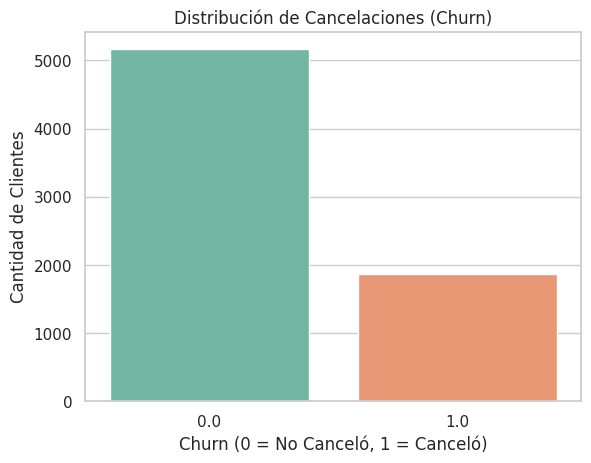

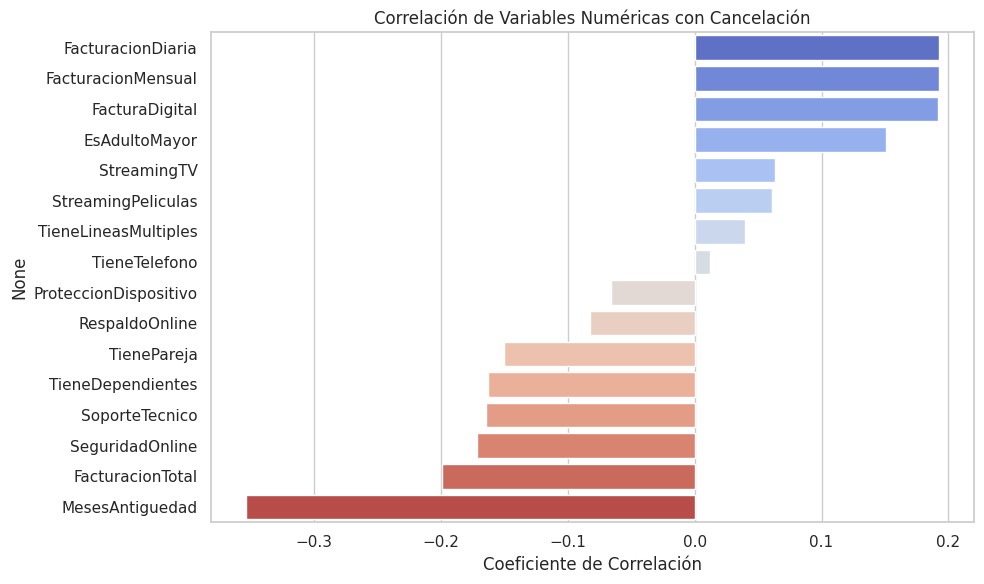

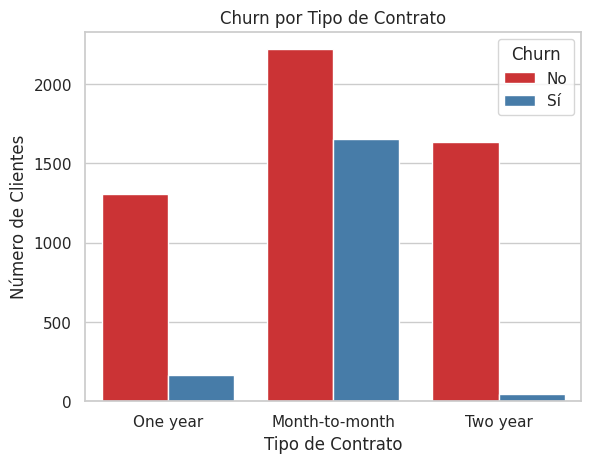

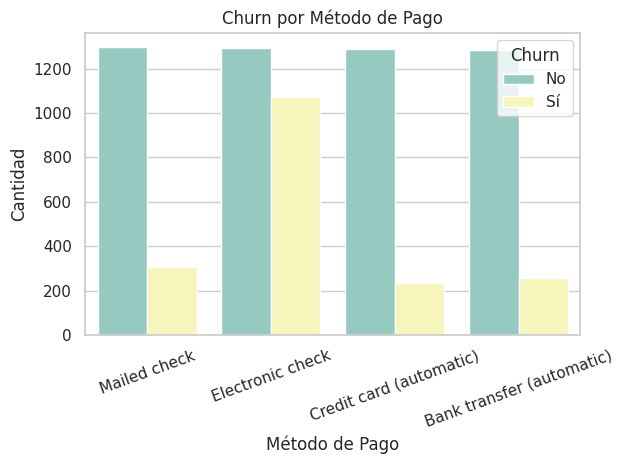

### Tabla de variables numéricas por churn
**Churn = 0 → Clientes que no cancelaron**  \n**Churn = 1 → Clientes que sí cancelaron**

,FacturacionTotal_mean,FacturacionTotal_median,FacturacionTotal_std,FacturacionMensual_mean,FacturacionMensual_median,FacturacionMensual_std,FacturacionDiaria_mean,FacturacionDiaria_median,FacturacionDiaria_std,MesesAntiguedad_mean,MesesAntiguedad_median,MesesAntiguedad_std
Churn,,,,,,,,,,,,
0.0,2555.34,1683.60,2329.46,61.31,64.45,31.09,2.04,2.15,1.04,37.65,38.0,24.08
1.0,1531.80,703.55,1890.82,74.44,79.65,24.67,2.48,2.66,0.82,17.98,10.0,19.53


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

raw_df = pd.read_json("/content/TelecomX_Data.json")
df = pd.json_normalize(raw_df.to_dict(orient="records"))
df.columns = df.columns.str.replace('.', '_')


df['Churn'] = df['Churn'].replace('', np.nan).map({'Yes': 1, 'No': 0})

df.dropna(subset=['Churn', 'account_Charges_Total'], inplace=True)


df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

bin_cols = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in bin_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})


columnas_renombradas = {
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'EsAdultoMayor',
    'customer_Partner': 'TienePareja',
    'customer_Dependents': 'TieneDependientes',
    'customer_tenure': 'MesesAntiguedad',
    'phone_PhoneService': 'TieneTelefono',
    'phone_MultipleLines': 'TieneLineasMultiples',
    'internet_InternetService': 'TipoInternet',
    'internet_OnlineSecurity': 'SeguridadOnline',
    'internet_OnlineBackup': 'RespaldoOnline',
    'internet_DeviceProtection': 'ProteccionDispositivo',
    'internet_TechSupport': 'SoporteTecnico',
    'internet_StreamingTV': 'StreamingTV',
    'internet_StreamingMovies': 'StreamingPeliculas',
    'account_Contract': 'TipoContrato',
    'account_PaperlessBilling': 'FacturaDigital',
    'account_PaymentMethod': 'MetodoPago',
    'account_Charges_Monthly': 'FacturacionMensual',
    'account_Charges_Total': 'FacturacionTotal',
    'Cuentas_Diarias': 'FacturacionDiaria'
}

df = df.rename(columns=columnas_renombradas)
df_churn = df[df['Churn'].isin([0, 1])].copy() # Create a copy to avoid SettingWithCopyWarning


numericas_interes = ['FacturacionTotal', 'FacturacionMensual', 'FacturacionDiaria', 'MesesAntiguedad']
for col in numericas_interes:
    df_churn[col] = pd.to_numeric(df_churn[col], errors='coerce')


df_churn.dropna(subset=numericas_interes, inplace=True)



sns.countplot(data=df_churn, x='Churn', palette='Set2')
plt.title('Distribución de Cancelaciones (Churn)')
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Cantidad de Clientes')
plt.show()

plt.figure(figsize=(10,6))
corr = df_churn.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlación de Variables Numéricas con Cancelación')
plt.xlabel('Coeficiente de Correlación')
plt.tight_layout()
plt.show()


sns.countplot(data=df_churn, x='TipoContrato', hue='Churn', palette='Set1')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

## Churn por Método de Pago
sns.countplot(data=df_churn, x='MetodoPago', hue='Churn', palette='Set3')
plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.xticks(rotation=20)
plt.ylabel('Cantidad')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

## Distribución numérica por churn
display(Markdown("### Tabla de variables numéricas por churn\n**Churn = 0 → Clientes que no cancelaron**  \\n**Churn = 1 → Clientes que sí cancelaron**"))
tabla_numericas = df_churn.groupby('Churn')[numericas_interes].agg(['mean', 'median', 'std']).round(2)
tabla_numericas.columns = ['_'.join(col) for col in tabla_numericas.columns]
display(tabla_numericas)

# Conclusiones e Insights

###- ❗Los contratos "mes a mes" tienen una tasa de cancelación 🔴15 veces más alta que los contratos de 2 años.
###- ❗El pago por "cheque electrónico" está fuertemente asociado con mayor churn.
###- ❗Clientes con menos meses de antigüedad y facturación mensual más alta tienden a cancelar más.
###- ❗Servicios adicionales como "Soporte Técnico" y "Seguridad Online" están negativamente correlacionados con la cancelación.

# ⭕ Recomendaciones Estratégicas

### ✅ Fomentar contratos largos (anuales o bianuales) mediante descuentos o promociones.
### ✅. Incentivar el uso de pagos automáticos en lugar de cheques electrónicos.
###✅. Implementar programas de retención durante los primeros 6 meses.
###✅ Potenciar servicios de valor como soporte técnico y seguridad para aumentar la fidelización.